# Rattrapage python 2022

<u> Consignes </u>:  

Tout d'abord, indiquez de manière claire (titre et dans la cellule ci dessus) le nom de votre binôme.

1 point bonus sera dédié à la clarté du code et de vos commentaires. 
N'hésitez pas à créer des cellules de type "Markdown" supplémentaires ou des commentaires pour expliquer votre raisonnement.
Merci de traiter une question par cellule, et d'indiquer en début de cellule la question traitée par un commentaire.

Des graphiques peu lisibles ou sans légendes n'auront pas tous les points.

Ce partiel est un travail de groupe à réaliser à 2. Il est attendu que **les travaux de deux groupes différents soient clairement différents** (et des points seront retirés dans le cas contraire).

Toutes les questions peuvent être résolues avec les fonctions et méthodes vues en cours. Néanmoins, vous pouvez vous aider des documentations des librairies vues en cours ainsi que des sites classiques de questions/réponses de programmation (eg: Quora, Stackoverflow) pour vous débloquer sur un point particulier.


#### MERCI DE VERIFIER QUE VOTRE CODE FONCTIONNE EN EXECUTANT LES CELLULES DE MANIERE SEQUENTIELLE (DE LA PREMIERE A LA DERNIERE). 

Vous pouvez faire "Noyau -> Redémarrer & tout exécuter" pour redémarrer et relancer tous les calculs dans le bon ordre. 


## Exercice 1 - 9 points

On étudie ici la base de données de fréquentation des musées en France entre 2001 et 2020

1) Lire la base de données et afficher les 15 premières lignes de la base (1pt)

2) Trouver et indiquer dans une cellule de type texte ou Markdown les noms des colonnes ayant plus de la moitié de données manquantes (1pt)

3) Supprimer les colonnes 'DATE APPELLATION', 'Note', 'ID MUSEOFILE' et 'Observations' (1pt)

4) Supprimer les lignes ayant des données manquantes et vérifiez que vous obtenez 18406 lignes (1pt)

5) Créer une base de données pour le "Musée du Louvre", et afficher la fréquentation totale au cours des dernières années dans un graphique de votre choix (2pt)

6) Filtrer les données pour ne garder que l'année 2020 (0,5pt)

7) Grouper les données par département (sur 2020) et afficher sur un bar plot le nombre total de visites des musées pour chaque département (2,5pt)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#on importe les packages 1 fois pour cette exercice pour les utuliser plus tard dans nos codes

In [2]:
#1) Lire la base de données et afficher les 15 premières lignes de la base (1pt)

dataframe=pd.read_csv(r'C:\Users\9820937G\OneDrive - SNCF\Bureau\frequentation_des_musees.csv')
#on nomme le document dataframe et importe avec le chemin, pour changer ce chemin et importer celui qui est sur vos bureaux 
#il faut juste changer le chemin la partie entre ''
dataframe.head(15)


,REF DU MUSEE,NOM DU MUSEE,Année,REGION,VILLE,DATE APPELLATION,PAYANT,GRATUIT,TOTAL,Note,ID MUSEOFILE,NOMDEP,Observations;;
0,3826901,Musée Matheysin,2001.0,RHONE-ALPES,LA MURE,NaN,3650.0,1600.0,5250.0,NaN,NaN,ISERE,;;
1,7218199,Musée Vert Véron-de-Forbonnais,2001.0,PAYS DE LA LOIRE,LE MANS,NaN,12436.0,0.0,12436.0,NaN,NaN,SARTHE,;;
2,5312201,Musée Archéologique Départemental de Jublains,2001.0,PAYS DE LA LOIRE,JUBLAINS,NaN,8377.0,25626.0,34003.0,NaN,NaN,MAYENNE,;;
3,5307701,Musée Communal Robert Tatin,2001.0,PAYS DE LA LOIRE,COSSE-LE-VIVIEN,NaN,13382.0,2190.0,15572.0,NaN,NaN,MAYENNE,;;
4,4909901,Musée d'Art et d'Histoire,2001.0,PAYS DE LA LOIRE,CHOLET,NaN,5213.0,12900.0,18113.0,NaN,NaN,MAINE-ET-LOIRE,;;
5,4900702,Musée Pincé,2001.0,PAYS DE LA LOIRE,ANGERS,NaN,5417.0,8760.0,14177.0,NaN,NaN,MAINE-ET-LOIRE,;;
6,4410901,Muséum d'Histoire Naturelle de Nantes,2001.0,PAYS DE LA LOIRE,NANTES,NaN,16814.0,31239.0,48053.0,NaN,NaN,LOIRE-ATLANTIQUE,;;
7,7662401,Association de l'Horlogerie Aliermontaise,2001.0,HAUTE-NORMANDIE,SAINT-NICOLAS-D'ALIERMONT,NaN,736.0,200.0,936.0,NaN,NaN,SEINE-MARITIME,;;
8,7654007,Muséum d'Histoire Naturelle,2001.0,HAUTE-NORMANDIE,ROUEN,NaN,NaN,NaN,NaN,F,NaN,SEINE-MARITIME,;;
9,7647301,Ecomusée de la Basse-Seine,2001.0,HAUTE-NORMANDIE,NOTRE-DAME-DE-BLIQUETUIT,NaN,26163.0,7316.0,33479.0,NaN,NaN,SEINE-MARITIME,;;


In [3]:

#2) Trouver et indiquer dans une cellule de type texte ou Markdown 
#les noms des colonnes ayant plus de la moitié de données manquantes (1pt)

#afin de trouver le ration des valeur manquantes, on determine les valeurs vide avec la fonction .isna 
#et pour avoir le nombre de ligne complete on fait len()

total=len(dataframe)
isna=dataframe.isna().sum()/total *100
isna
isna=pd.DataFrame(isna)
isna
isna.rename(columns={0:'ratio'},inplace=True)
isna

,ratio
REF DU MUSEE,0.000000
NOM DU MUSEE,2.060370
Année,2.068849
REGION,2.060370
VILLE,2.060370
DATE APPELLATION,10.412074
PAYANT,16.033576
GRATUIT,16.097168
TOTAL,16.101407
Note,86.959471


In [4]:
#2) Trouver et indiquer dans une cellule de type texte ou Markdown 
#les noms des colonnes ayant plus de la moitié de données manquantes (1pt)

#on filtre le dataframe sur les supérieur ou egale à 50% puis on en sort les colone correspandante
isna=isna[isna['ratio']>=50]
isna.iloc[:,0]


Note            86.959471
ID MUSEOFILE    90.618111
Name: ratio, dtype: float64

les colonnes ayant plus de la moitié de données manquantes sont  "Note" et "ID MUSEOFILE"

In [5]:
#3) Supprimer les colonnes 'DATE APPELLATION', 'Note', 'ID MUSEOFILE' et 'Observations' (1pt)

newdataframe=dataframe.drop(columns=['DATE APPELLATION','Note','ID MUSEOFILE', 'Observations;;'])
newdataframe

,REF DU MUSEE,NOM DU MUSEE,Année,REGION,VILLE,PAYANT,GRATUIT,TOTAL,NOMDEP
0,3826901,Musée Matheysin,2001.0,RHONE-ALPES,LA MURE,3650.0,1600.0,5250.0,ISERE
1,7218199,Musée Vert Véron-de-Forbonnais,2001.0,PAYS DE LA LOIRE,LE MANS,12436.0,0.0,12436.0,SARTHE
2,5312201,Musée Archéologique Départemental de Jublains,2001.0,PAYS DE LA LOIRE,JUBLAINS,8377.0,25626.0,34003.0,MAYENNE
3,5307701,Musée Communal Robert Tatin,2001.0,PAYS DE LA LOIRE,COSSE-LE-VIVIEN,13382.0,2190.0,15572.0,MAYENNE
4,4909901,Musée d'Art et d'Histoire,2001.0,PAYS DE LA LOIRE,CHOLET,5213.0,12900.0,18113.0,MAINE-ET-LOIRE
...,...,...,...,...,...,...,...,...,...
23583,6743701,Musée du Château des Rohan,2020.0,GRAND EST,SAVERNE,1449.0,1740.0,3189.0,BAS-RHIN
23584,3719601,Musée de l'Hôtel de Ville,2020.0,CENTRE-VAL DE LOIRE,RICHELIEU,1606.0,500.0,2106.0,INDRE ET LOIRE
23585,8413902,Musée Jean Garcin 39-45 : L'appel de la Liberté,2020.0,PROVENCE-ALPES-CÔTE D'AZUR,FONTAINE-DE-VAUCLUSE,3160.0,1035.0,4195.0,VAUCLUSE
23586,8211202,Musée des arts et traditions populaires (Abbaye),NaN,OCCITANIE,MOISSAC,54660.0,11254.0,65914.0,TARN-ET-GARONNE


In [6]:
#4) Supprimer les lignes ayant des données manquantes et vérifiez que vous obtenez 18406 lignes (1pt)

newdataframe.dropna(axis=1)

newdataframe.isna().sum()

len(newdataframe)




23588

In [7]:
#5) Créer une base de données pour le "Musée du Louvre", et 
#afficher la fréquentation totale au cours des dernières années dans un graphique de votre choix (2pt)


louvre=newdataframe[newdataframe['NOM DU MUSEE'] == 'Musée du Louvre']
louvre=louvre.astype({'Année':'int'})
louvre=louvre.astype({'Année':'str'})
louvre


,REF DU MUSEE,NOM DU MUSEE,Année,REGION,VILLE,PAYANT,GRATUIT,TOTAL,NOMDEP
393,7510106,Musée du Louvre,2001,ILE-DE-FRANCE,PARIS,3325837.0,1838088.0,5163925.0,PARIS
1912,7510106,Musée du Louvre,2002,ILE-DE-FRANCE,PARIS,3979000.0,1805000.0,5784000.0,PARIS
2626,7510106,Musée du Louvre,2003,ILE-DE-FRANCE,PARIS,3782240.0,1944400.0,5726640.0,PARIS
3986,7510106,Musée du Louvre,2004,ILE-DE-FRANCE,PARIS,4561000.0,2333000.0,6894000.0,PARIS
4696,7510106,Musée du Louvre,2005,ILE-DE-FRANCE,PARIS,5021000.0,2490000.0,7511000.0,PARIS
6572,7510106,Musée du Louvre,2006,ILE-DE-FRANCE,PARIS,5667000.0,2647000.0,8314000.0,PARIS
7160,7510106,Musée du Louvre,2007,ILE-DE-FRANCE,PARIS,5521236.0,2703407.0,8224643.0,PARIS
9046,7510106,Musée du Louvre,2008,ILE-DE-FRANCE,PARIS,5699810.0,2722397.0,8422207.0,PARIS
9391,7510106,Musée du Louvre,2009,ILE-DE-FRANCE,PARIS,5747911.0,2639756.0,8387667.0,PARIS
11477,7510106,Musée du Louvre,2010,ILE-DE-FRANCE,PARIS,5162394.0,3184027.0,8346421.0,PARIS


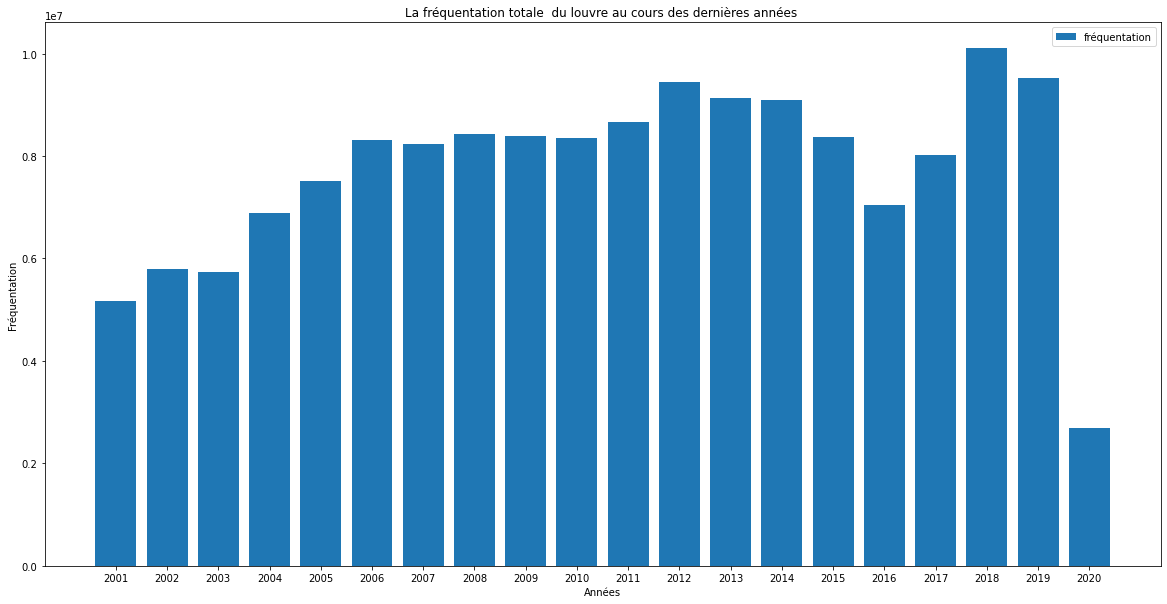

In [8]:
#5) Créer une base de données pour le "Musée du Louvre", et 
#afficher la fréquentation totale au cours des dernières années dans un graphique de votre choix (2pt)


fig = plt.figure()
 
fig.set_figheight(10)
fig.set_figwidth(20)
plt.bar(louvre['Année'], louvre['TOTAL'],label='fréquentation')



plt.title('La fréquentation totale  du louvre au cours des dernières années ')
plt.xlabel('Années')
plt.ylabel('Fréquentation')
plt.legend()



In [9]:
#6) Filtrer les données pour ne garder que l'année 2020 (0,5pt)


data2020=newdataframe[newdataframe['Année'] == 2020]
data2020

,REF DU MUSEE,NOM DU MUSEE,Année,REGION,VILLE,PAYANT,GRATUIT,TOTAL,NOMDEP
22471,1610202,Musée des Arts du Cognac,2020.0,NOUVELLE-AQUITAINE,COGNAC,6162.0,1149.0,7311.0,CHARENTE
22472,1730006,Muséum d'Histoire Naturelle et d'Ethnographie,2020.0,NOUVELLE-AQUITAINE,LA ROCHELLE,7582.0,22745.0,30327.0,CHARENTE-MARITIME
22473,1730002,Musée du Nouveau Monde,2020.0,NOUVELLE-AQUITAINE,LA ROCHELLE,4479.0,8209.0,12688.0,CHARENTE-MARITIME
22474,1730005,Musée Protestant,2020.0,NOUVELLE-AQUITAINE,LA ROCHELLE,322.0,223.0,545.0,CHARENTE-MARITIME
22475,3400301,Musée Agathois,2020.0,OCCITANIE,AGDE,349.0,2275.0,2624.0,HERAULT
...,...,...,...,...,...,...,...,...,...
23581,6718002,Musée Alsacien,2020.0,GRAND EST,HAGUENAU,160.0,195.0,355.0,BAS-RHIN
23582,6732401,Maison de l'Archéologie des Vosges du Nord,2020.0,GRAND EST,NIEDERBRONN-LES-BAINS,213.0,201.0,414.0,BAS-RHIN
23583,6743701,Musée du Château des Rohan,2020.0,GRAND EST,SAVERNE,1449.0,1740.0,3189.0,BAS-RHIN
23584,3719601,Musée de l'Hôtel de Ville,2020.0,CENTRE-VAL DE LOIRE,RICHELIEU,1606.0,500.0,2106.0,INDRE ET LOIRE


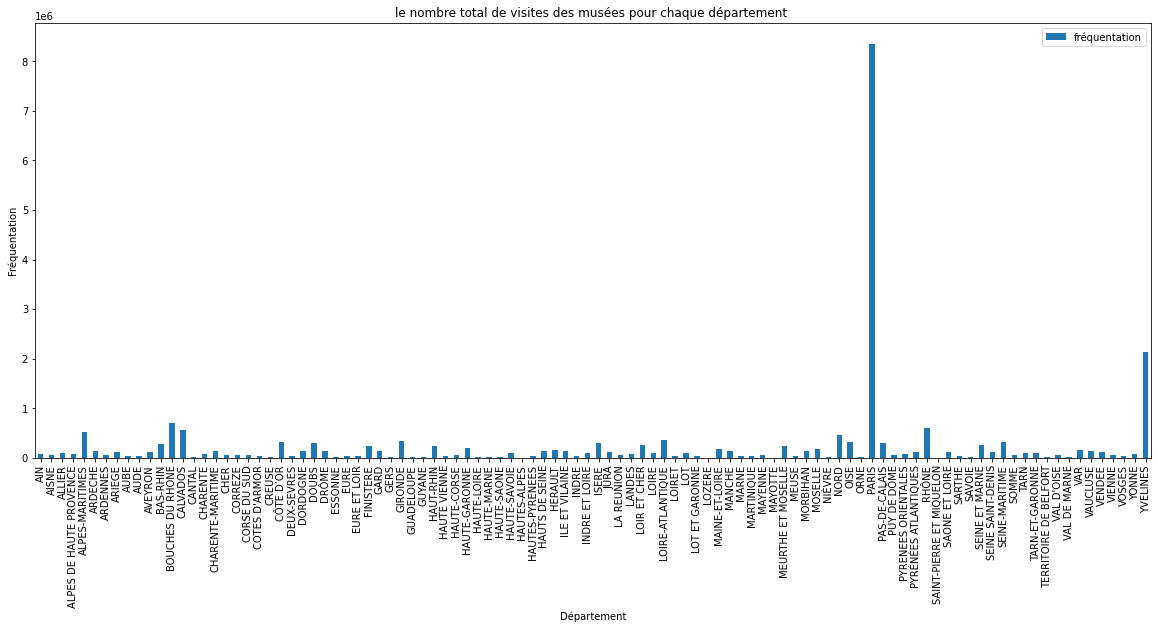

In [10]:
#7) Grouper les données par département (sur 2020) et
#afficher sur un bar plot le nombre total de visites des musées pour chaque département (2,5pt)


data2020group=data2020.groupby(['NOMDEP'])['TOTAL'].sum().plot(kind = "bar",figsize=(20,8),label='fréquentation')
data2020group

plt.title('le nombre total de visites des musées pour chaque département ')
plt.xlabel('Département')
plt.ylabel('Fréquentation')
plt.legend()

## Exercice 2 - 3pts 

Choisissez un graphique adéquat pour représenter ces données (10 premiers films au box office en 2021 en France). 
1 point est consacré à l'esthétique du graphique (taille, lisibilité, etc.) 

    Spider-Man : No Way Home - 7 319 651
    Mourir peut attendre - 4 007 532
    Encanto : La Fantastique Famille Madrigal - 3 202 352
    Dune - 3 165 270
    Tous en scène 2 - 2 673 215
    Kaamelott : Premier Volet - 2 652 338
    Les Tuche 4 - 2 436 419
    BAC Nord - 2 218 308
    Fast and Furious 9 - 2 025 112
    Conjuring : Sous l'emprise du Diable - 1 887 284


In [11]:
#exercie 2 :Choisissez un graphique adéquat pour représenter ces données (10 premiers films au box office en 2021 en France)

import numpy as np
import pandas as pd

#on importe les packages 1 fois pour cette exercice pour les utuliser plus tard dans nos codes
film=['Spider-Man : No Way Home','Mourir peut attendre','Encanto : La Fantastique Famille Madrigal','Dune','Tous en scène 2',
      'Kaamelott : Premier Volet','Les Tuche 4','BAC Nord','Fast and Furious 9','Conjuring : Sous l emprise du Diable']
nb=[7319651,4007532,3202352,3165270,2673215,2652338,2652338,2218308,2025112,1887284]
df=pd.DataFrame(list(zip(film,nb)),columns=['films','entre'])
df


,films,entre
0,Spider-Man : No Way Home,7319651
1,Mourir peut attendre,4007532
2,Encanto : La Fantastique Famille Madrigal,3202352
3,Dune,3165270
4,Tous en scène 2,2673215
5,Kaamelott : Premier Volet,2652338
6,Les Tuche 4,2652338
7,BAC Nord,2218308
8,Fast and Furious 9,2025112
9,Conjuring : Sous l emprise du Diable,1887284


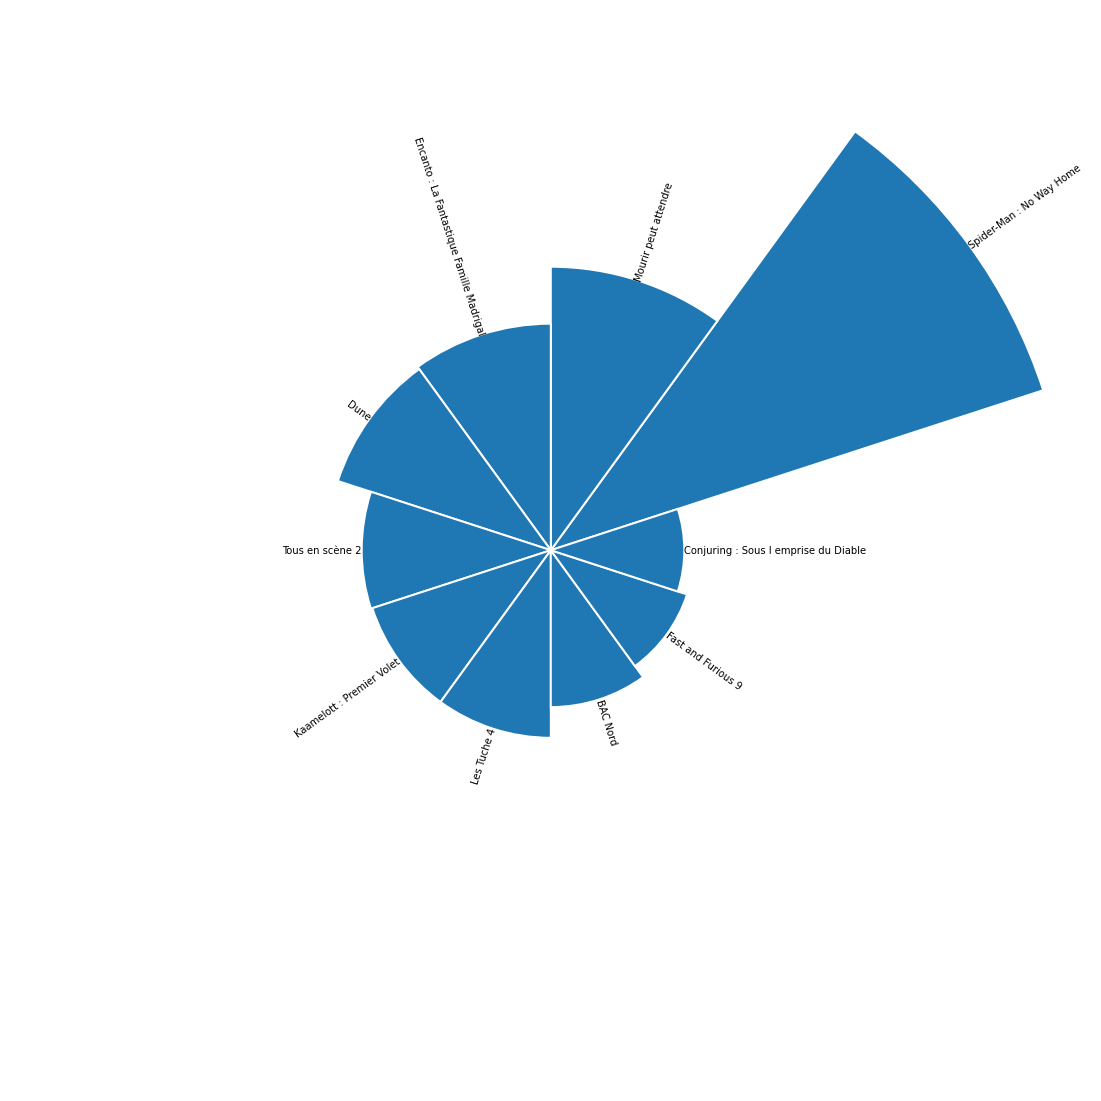

In [12]:
#exercie 2 :Choisissez un graphique adéquat pour représenter ces données (10 premiers films au box office en 2021 en France)

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["entre"].values
LABELS = df["films"].values




plt.figure(figsize=(20,20))


ax = plt.subplot(111, polar=True)


plt.axis('off')


upperLimit = 100
lowerLimit = 30


max = VALUES.max()


slope = (max - lowerLimit) / max
heights = slope * VALUES + lowerLimit


width = 2*np.pi / len(df.index)


indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles


bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")


labelPadding = 4



for bar, angle, height, label in zip(bars,angles, heights, df["films"]):

    
    rotation = np.rad2deg(angle)

   
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"


    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


## EXERCICE 3 - 8 points + 2 points bonus

Voici une liste de maisons avec leur taille et leur prix à l'achat: 

tailles (en m^2) = [209.8, 164. ,  14.3, 196.9, 211.8, 248.4, 195.5, 245.2, 141.6,
        94.6,  62.6, 111.9, 156.1, 212.9, 108.4, 182.5, 158.4, 204.6,
       107.3, 100.8, 102.5, 222. , 107.3, 194.6, 120.5, 148.4, 106. ,
       196.4, 157.8,  62.9, 150.7, 136. ,  93.3, 169. , 245.2, 150.2,
       142.7, 141.5, 176.8, 153.1, 210. , 153.6, 179.5,  51.9, 174.5,
       184.8, 170.8, 126.7, 113.6, 204. ]
       

prix (en milliers d'euros) = [629.94, 498.72,  67.33, 607.67, 597.19, 778.66, 636.29, 781.71,
       441.71, 334.83, 175.48, 350.54, 460.37, 620.38, 318.3 , 560.4 ,
       471.03, 619.64, 392.21, 320.57, 339.65, 710.07, 339.16, 613.01,
       382.87, 527.17, 420.31, 625.73, 512.22, 202.51, 471.88, 483.01,
       232.5 , 538.12, 801.04, 536.7 , 488.49, 462.69, 590.46, 546.34,
       641.67, 453.4 , 540.86, 223.62, 567.37, 622.73, 549.31, 416.54,
       348.52, 676.22]


### QUESTIONS

1) Créez un dataframe contenant ces informations dans 2 colonnes (1 point)

2) Affichez un nuage de point avec la taille en abscisse et le prix en ordonnée. (1.5 points)
  Ajoutez tous les attributs graphiques qui vous semblent pertinents ou nécessaires 
  
3) D'après le graphique précédent, nous voyons une corrélation évidente entre la taille et le prix, qui peut être modélisée par le modèle de régression suivant : 

### prix = 3 * taille + 20

a) Ecrivez une fonction prenant en entrée une taille en m^2 et renvoyant son prix selon le modèle (2 points)

b) Créez une colonne dans le dataframe de la question 1 avec le prix estimé pour chaque maison ( 1 point)

c) Créez une colonne dans le dataframe de la question 1 valant l'erreur effectuée par le modèle ( c'est à dire la différence entre la prédiction du modèle et le vrai prix) (1 point)

d) Affichez les valeurs d'erreur avec un histogramme. Ajoutez tous les attributs graphiques qui vous semblent pertinents ou nécessaires. (1.5 points)


#### BONUS (2 points) : 

4) Reprenez votre code de la question 2) . Ajoutez au nuage de points la ligne de régression donnée par le modèle en pointillés rouges.

In [13]:
tailles = [209.8, 164. , 14.3, 196.9, 211.8, 248.4, 195.5, 245.2, 141.6, 94.6,
                   62.6, 111.9, 156.1, 212.9, 108.4, 182.5, 158.4, 204.6, 
                   107.3, 100.8, 102.5, 222. , 107.3, 194.6, 120.5, 148.4, 106. , 
                   196.4, 157.8, 62.9, 150.7, 136. , 93.3, 169. , 245.2, 150.2, 142.7, 
                   141.5, 176.8, 153.1, 210. , 153.6, 179.5, 51.9, 174.5, 184.8, 170.8, 126.7, 113.6, 204. ]

prix  = [629.94, 498.72, 67.33, 607.67, 597.19, 778.66, 636.29, 781.71, 441.71,
                             334.83, 175.48, 350.54, 460.37, 620.38, 318.3 , 560.4 , 471.03, 619.64, 
                             392.21, 320.57, 339.65, 710.07, 339.16, 613.01, 382.87, 527.17, 420.31, 
                             625.73, 512.22, 202.51, 471.88, 483.01, 232.5 , 538.12, 801.04, 536.7 , 
                             488.49, 462.69, 590.46, 546.34, 641.67, 453.4 , 540.86, 223.62, 567.37,
                             622.73, 549.31, 416.54, 348.52, 676.22]

In [14]:
#1) Créez un dataframe contenant ces informations dans 2 colonnes (1 point)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tp=pd.DataFrame(list(zip(tailles,prix)),columns=['tailles','prix'])
tp.head()

,tailles,prix
0,209.8,629.94
1,164.0,498.72
2,14.3,67.33
3,196.9,607.67
4,211.8,597.19


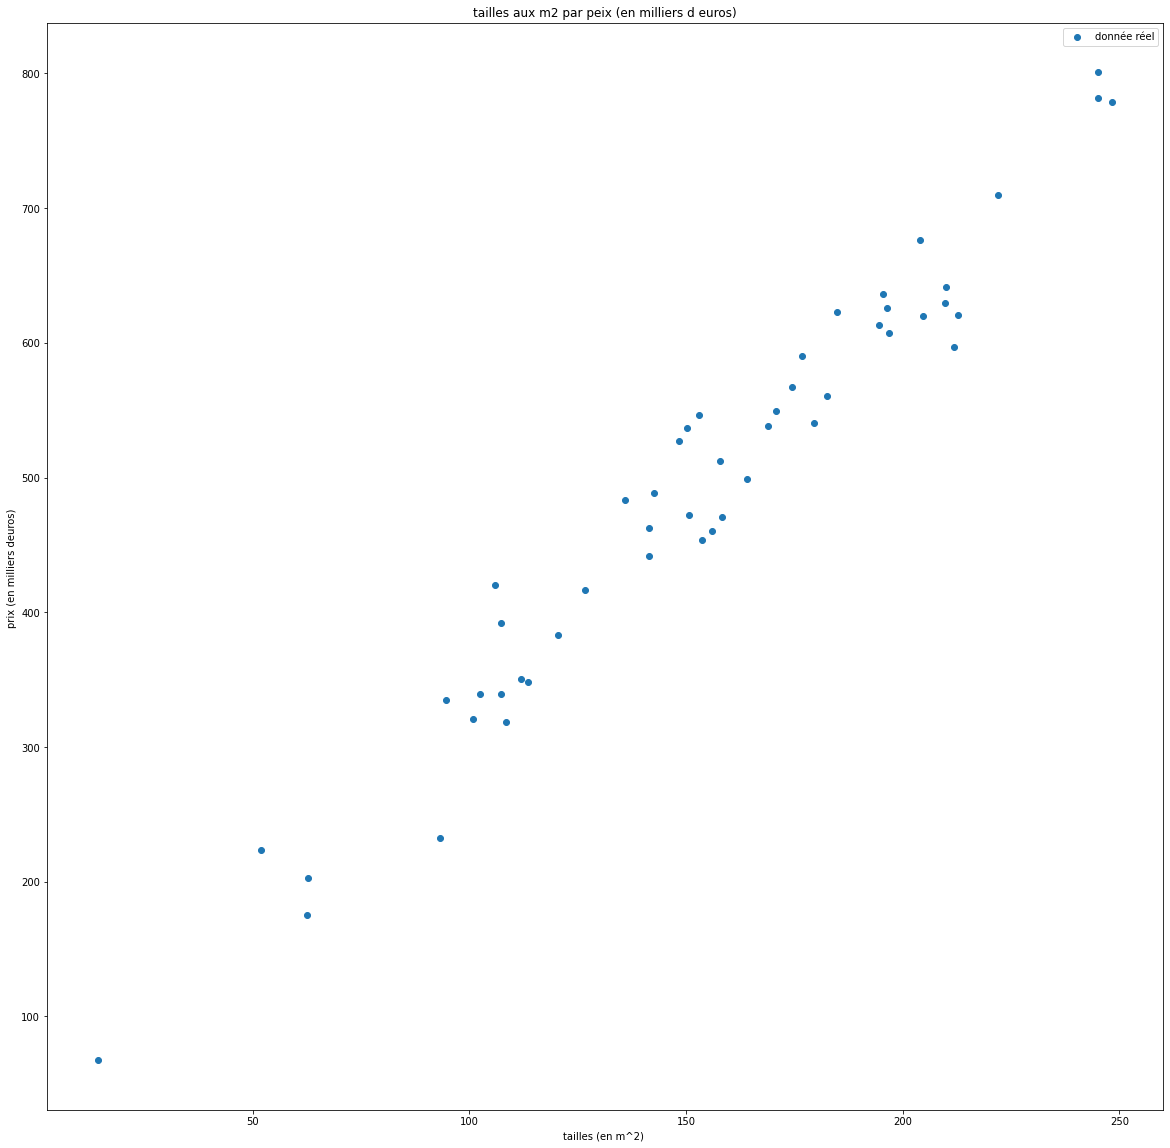

In [15]:
#2) Affichez un nuage de point avec la taille en abscisse et le prix en ordonnée. (1.5 points) 
#Ajoutez tous les attributs graphiques qui vous semblent pertinents ou nécessaires

x=tp['tailles']
y=tp['prix']
fig = plt.figure()
 
fig.set_figheight(20)
fig.set_figwidth(20)

plt.scatter(x, y,label='donnée réel')

plt.title('tailles aux m2 par peix (en milliers d euros)')
plt.xlabel('tailles (en m^2) ')
plt.ylabel('prix (en milliers deuros) ')
plt.legend()

In [16]:
#a) Ecrivez une fonction prenant en entrée une taille en m^2 et renvoyant son prix selon le modèle (2 points) 
#prix = 3 * taille + 20


t_m=int(input("Mettez votre taille : "))
def fonc (t_m):
    prix=3*t_m+20
    print('le prix au m^2 est',round(prix,2), 'k euros')
    
fonc(t_m)

Mettez votre taille : 20
le prix au m^2 est 80 k euros


In [17]:
#b) Créez une colonne dans le dataframe de la question 1 avec le prix estimé pour chaque maison ( 1 point)
tp['prix_estimer']=3*tp['tailles']+20

tp.head()


,tailles,prix,prix_estimer
0,209.8,629.94,649.4
1,164.0,498.72,512.0
2,14.3,67.33,62.9
3,196.9,607.67,610.7
4,211.8,597.19,655.4


In [18]:
#c) Créez une colonne dans le dataframe de la question 1 valant l'erreur effectuée par le modèle
#( c'est à dire la différence entre la prédiction du modèle et le vrai prix) (1 point)
tp['erreur']=tp['prix_estimer']-tp['prix']
tp


,tailles,prix,prix_estimer,erreur
0,209.8,629.94,649.4,19.46
1,164.0,498.72,512.0,13.28
2,14.3,67.33,62.9,-4.43
3,196.9,607.67,610.7,3.03
4,211.8,597.19,655.4,58.21
5,248.4,778.66,765.2,-13.46
6,195.5,636.29,606.5,-29.79
7,245.2,781.71,755.6,-26.11
8,141.6,441.71,444.8,3.09
9,94.6,334.83,303.8,-31.03


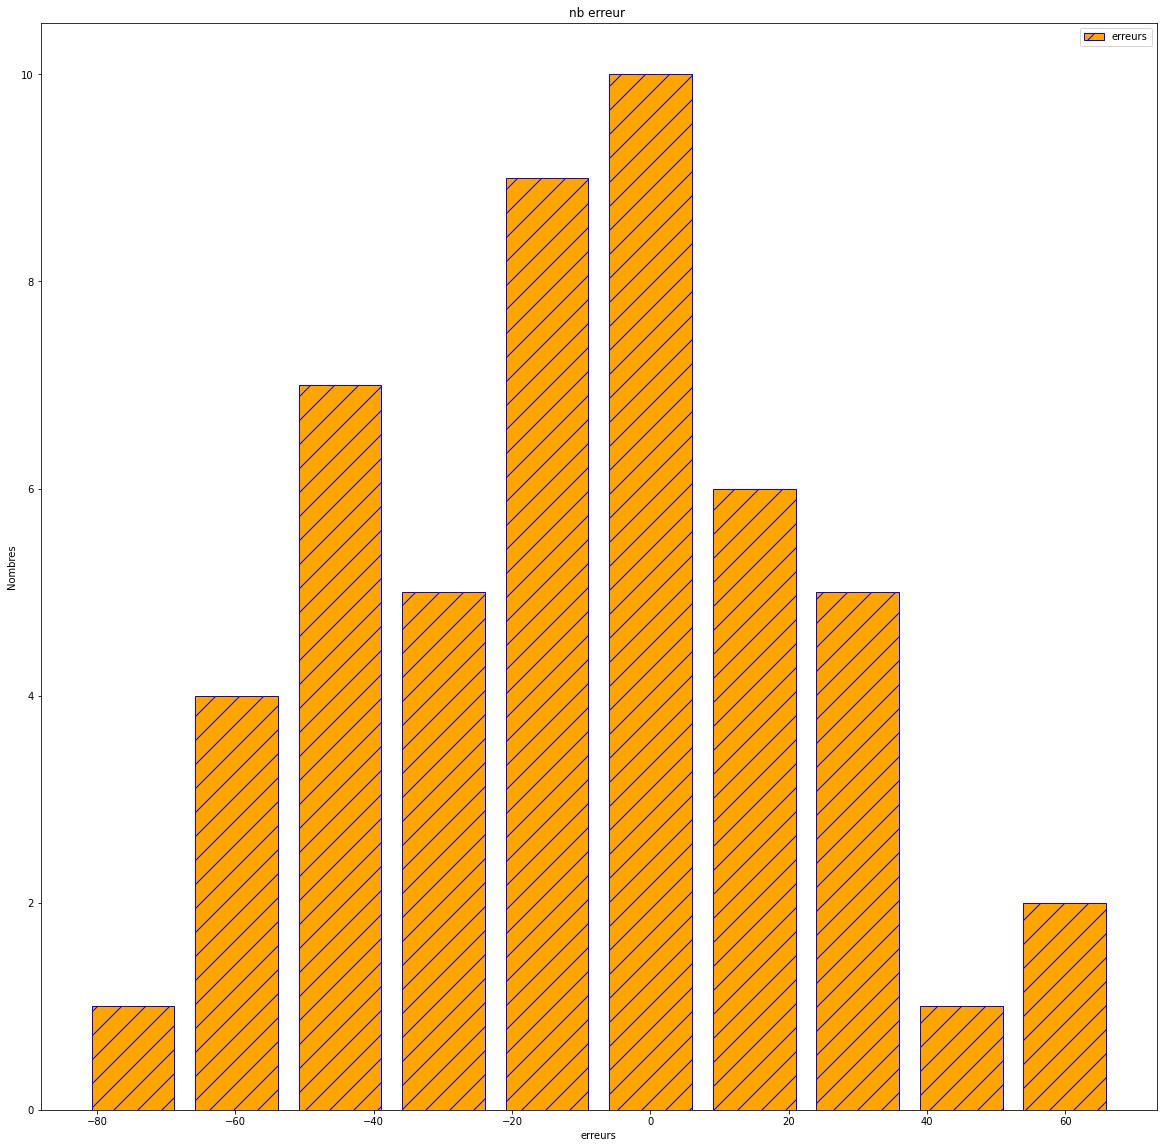

In [19]:
#d) Affichez les valeurs d'erreur avec un histogramme. 
#Ajoutez tous les attributs graphiques qui vous semblent pertinents ou nécessaires. (1.5 points)

valeurs=tp['erreur']

fig = plt.figure()
 
fig.set_figheight(20)
fig.set_figwidth(20)
plt.hist(valeurs, rwidth=0.8, color='orange',
         edgecolor='blue', hatch='/',label='erreurs')
plt.xlabel('erreurs')

plt.ylabel('Nombres')
plt.title("nb erreur ")
plt.legend()





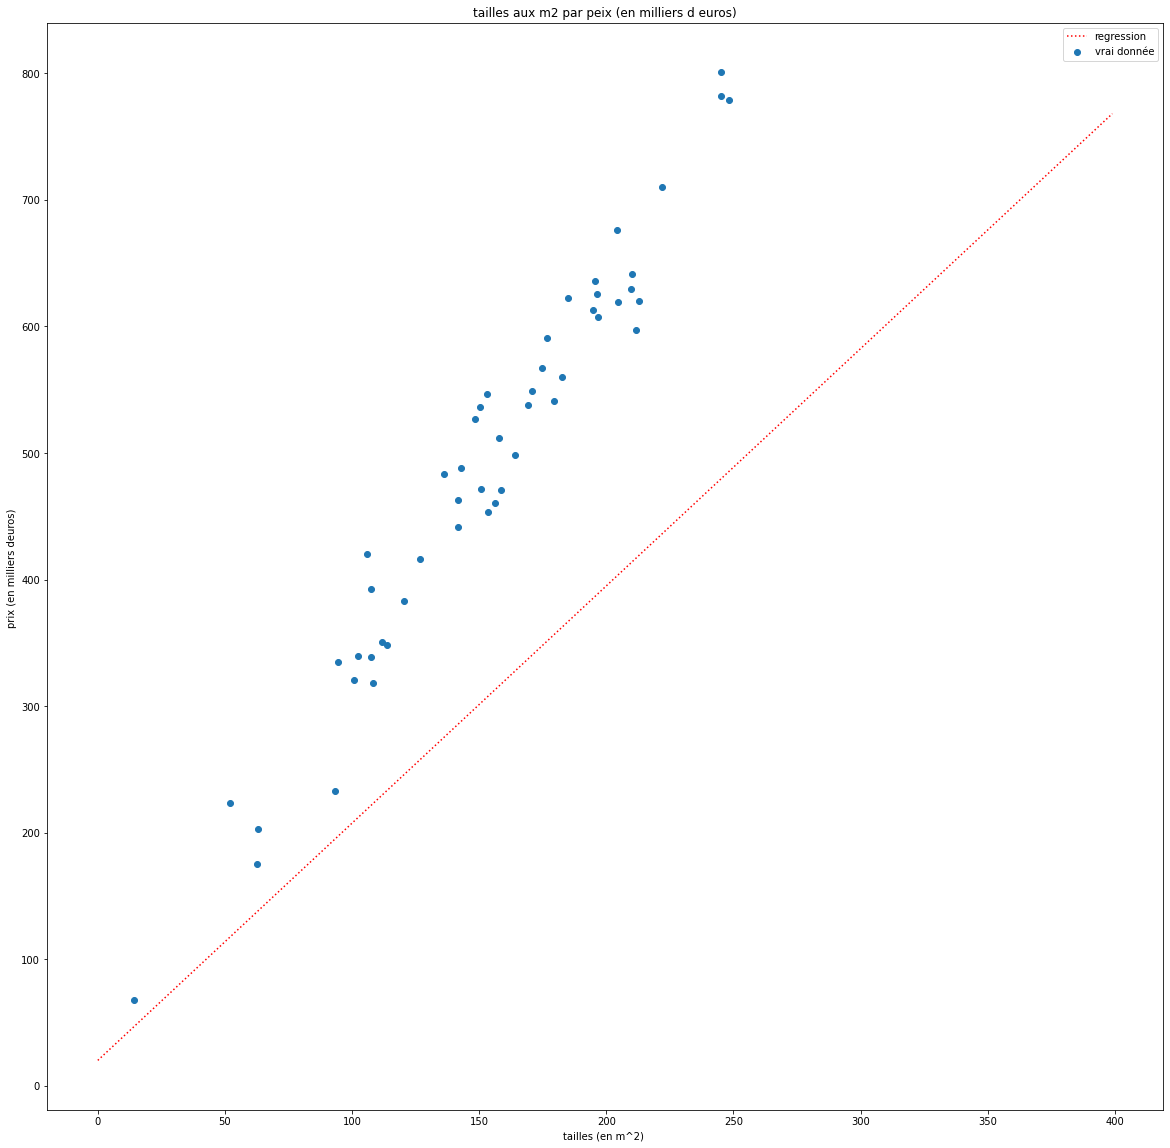

In [20]:

#BONUS (2 points) :
#4) Reprenez votre code de la question 2) . 
#Ajoutez au nuage de points la ligne de régression donnée par le modèle en pointillés rouges.

x=tp['tailles']
y=tp['prix']



taille = np.linspace(0,250,400, endpoint = False)
fonc= 3*taille+20
fonc




fig = plt.figure()
 
fig.set_figheight(20)
fig.set_figwidth(20)


plt.scatter(x, y,label='vrai donnée')




plt.plot(fonc,color='red',linestyle='dotted',label='regression')



plt.title('tailles aux m2 par peix (en milliers d euros)')
plt.xlabel('tailles (en m^2) ')
plt.ylabel('prix (en milliers deuros) ')

 
plt.legend()


In [21]:
#on remarque que la fonction les prix par rapport à la taille m2 ne suive pas la fonction 
#de régesion linaire prix = 3 * taille + 20
